# Possible Effects of Sunshine on Depression

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

For this project, we tried to find out if there was a relationship between the amount of sunshine exposure that a state receives and depression among adults. After our analysis, we found that annual sunshine percentages and depression rates across different states are slightly negatively correlated. Since some states receive more sunlight than others, it seems as though depression rates would be lower in places where there is more sunlight on average because sunlight is necessary to regulate serotonin and melatonin levels.

# Names

- Justin Nguyen
- Simon Liu
- Jonathan Tran
- Sabrina Du

<a id='research_question'></a>
# Research Question

Is there a correlation between annual sunshine percentages and depression rates among adults by states in the United States?


<a id='background'></a>

## Background & Prior Work

We are interested in researching to see if sunshine has an effect on depression because we enjoy being outside in the sun; especially after being in quarantine for over a year, there has been a decrease in the amount of time we have been in the sun. Because we are students doing online school, there are not as many chances to be outside because we are studying inside our homes. 

The amount of sunshine that a state receives largely depends on where it is located in the United States. According to Christopher Ingraham,
the sunniest place in the United States is Imperial County, California and the least-sunniest place in the United States is Island County, Washington (1). The sunniest day of the year occurs in July, and the least-sunniest day of the year occurs in December (1). In general, there is more sunlight in the southern part of the United States and less sunlight in the northern part of the United States.

According to Alice Park, an author at TIME Magazine, "\[o\]ne Australian study that measured levels of brain chemicals flowing directly out of the brain found that people had higher serotonin levels on bright sunny days than on cloudy ones" (2). In addition, "higher levels of serotonin correlate with better mood and feelings of satisfaction and calmness, and lower levels link to depression and anxiety" (2). Therefore, it may be that people who are exposed to more sunlight are generally happier. 

Sunlight is very important for one’s body functions in that it increases your blood flow and serotonin levels. Serotonin acts as a natural antidepressant, which explains why people tend to have seasonal depression during the winter (SAD). One main treatment of seasonal depression is phototherapy, which is supposed to act as sunlight to help boost serotonin levels. 

Another way sunlight helps boost one’s mood is by lowering your melatonin levels during the day. This helps you feel more awake and energized and sleep more easily at night. This also resets your circadian clock and allows you to produce enough melatonin later in the day when the sun is down. Having a normally functioning circadian rhythm allows you to fall asleep more easily. Those who have sleeping disorders tend to be more agitated. According to Harvard Health, those who live in the Northern states tend to suffer from SAD more than those from the Southern states (4). They recommend that you should be exposed to sunlight for at least half an hour everyday, preferably before 10 a.m. to reset your circadian clock. 


References (include links):
- 1) https://www.washingtonpost.com/news/wonk/wp/2015/07/13/map-where-americas-sunniest-and-least-sunny-places-are/
- 2) https://time.com/4888327/why-sunlight-is-so-good-for-you/
- 3) https://doi.org/10.1016/S0165-0327(00)00149-
- 4) https://www.health.harvard.edu/mind-and-mood/shining-a-light-on-winter-depression
- 5) https://www.tricitymed.org/2018/08/5-ways-the-sun-impacts-your-mental-and-physical-health/
- 6) https://www.healthline.com/health/depression/benefits-sunlight#_noHeaderPrefixedContent

# Hypothesis


We hypothesize that annual sunshine percentages and depression rates across different states will be negatively correlated. Based on a report in the Journal of Affective Disorders on the effect of morning sunlight on bipolar depression, we can see that there may be some correlation as natural sunlight seemed to be associated with improving bipolar depression (3). Because some states receive more sunlight than others, it seems as though depression rates would be lower in places where there is more sunlight on average because sunlight is necessary to regulate serotonin and melatonin levels.

# Dataset(s)

- Dataset Name: Ever told you have a form of depression?
- Link to the dataset: https://nccd.cdc.gov/BRFSSPrevalence/rdPage.aspx?rdReport=DPH_BRFSS.ExploreByTopic&irbLocationType=StatesAndMMSA&islClass=CLASS03&islTopic=TOPIC17&islYear=2011&rdRnd=71807 (depression.csv is the CSV file that was exported from this link)
- Number of observations: 56

This dataset was created by the Behavioral Risk Factor Surveillance System (BRFSS), whose objective is to collect uniform, state-specific data on preventive health practices and risk behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases that affect the adult population in the United States. Specifically, this data represents the percentage of respondents who answer 'Yes' when asked if someone has 'Ever told you that you have a form of depression?'.

- Dataset Name: Ranking of Cities Based on % Annual Possible Sunshine in Descending Order from Most to Least Average Possible Sunshine
- Link to the dataset: https://www1.ncdc.noaa.gov/pub/data/ccd-data/pctposrank.txt (sunshine.csv is the CSV file that was exported from this link)
- Number of observations: 174

This dataset was created by the National Oceanic and Atmospheric Administration. Specifically, this data represents the ranking of cities based on percentage of annual possible sunshine in descending order from most to least average possible sunshine.

Both of these datasets will be used because we want to see if there exists a relationship between depression rates among adults and sunshine percentages.

# Setup

In [1]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statmodels & patsy
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind

# Data Cleaning

Because the data that we found did not have a URL where we could access the data in a CSV file format. For the 'Ever told you have a form of depression?' dataset, they had a button that allowed us to directly export the data in a CSV file. For the 'Ranking of Cities Based on % Annual Possible Sunshine in Descending Order from Most to Least Average Possible Sunshine' dataset, we had to download the txt file and convert it to a CSV file. Both of these CSV files were included in our repository locally.

Overall, I would say that the data we had was generally clean. There were a few rows in the CSV's that we removed because they were not directly related to the data itself, but besides those, each variable that was measured was in a single column, each observation of a variable was in a different row, and there was one table for each type of data.

To get the data into a usable format, we had to make sure that we isolated the exact data that we needed to answer our question. This meant that we removed variables that were irrelevant and we also removed any observations that were not considered one of the 50 states in the United States, such as Puerto Rico, Washington D.C., etc.

Below are the steps we took to clean the 'Ever told you have a form of depression?' dataset:

1. Read in the depression.csv file.
2. Removed the last 11 rows that contained information that was not directly part of our data.
3. Removed the columns that would not be relevant to our data analysis in the future.
4. Converted the observations in the 'Sample_Size' column from floats to ints because there would never be a situation where we have part of a human in the sample size.
5. Converted the observations in the 'Year' column from floats to ints because years are not represented in decimal formats.
6. Converted the observations in the 'ID' column from strings to ints to remove the trailing '.0' at the end of the ID.
7. Renamed the 'Data_Value' column to 'Data_Value_Percents' to make it more clear what the observations in that column were.
8. Removed some rows in our data because the location was not one of the 50 states in the United States.
9. Reset the indices to 0.

In [27]:
# reads in the csv file
df = pd.read_csv("depression.csv")

# take out the last 11 rows that contain NaNs
df = df[:55]

# drops the columns that contain Nan
df = df.drop(columns = ['Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'FootnoteType', 'FootNoteSymbol', 'FootnoteText',  'URL', 'DatasourceAbbr', 'Agency'])

# drops unnecessary columns
df = df.drop(columns = ['ID', 'Stratification', 'Year', 'StratificationType', 'Topic', 'Data_Value_Unit', 'LocationOrder', 'ParentStateDisplayOrder', 'IndicatorId', 'High_Confidence_Limit', 'Low_Confidence_Limit', 'Data_Value_Type', 'Class', 'Indicator', 'DataSource', 'LocationDesc', 'Response'])

# convert floats to ints
df['Sample_Size'] = df['Sample_Size'].astype(int)

# rename column
df = df.rename(columns = {"Data_Value": "Data_Value_Percents"})

# drop first two rows because it is unnecessary for our table and last two because they are not US states
df = df.drop(df.index[[0,1, 10, 53, 54]])

# reset indices to start from 0
df = df.reset_index().drop(columns = ["index"])
df

,LocationAbbr,Data_Value_Percents,Sample_Size
0,AL,21.2,1638
1,AK,16.5,608
2,AZ,17.5,1231
3,AR,22.8,970
4,CA,12.3,2321
5,CO,17.6,2425
6,CT,15.4,1156
7,DE,14.2,702
8,FL,16.5,2254
9,GA,14.9,1491


Below are the steps we took to clean the 'Ranking of Cities Based on % Annual Possible Sunshine in Descending Order from Most to Least Average Possible Sunshine' dataset:

1. Read in the sunshine.csv file.
2. Remove the rows that are not one of the 50 states in the United States.
3. Separate the city and state that were previously in the same column into two different columns.
4. Merge the dataframes together and drop the original column that had the city and state together.
5. Rename the columns to 'CITY' and 'STATE'
6. Reorder the columns.
7. Remove unnecessary punctuation from 'STATE' column.

In [3]:
def standardize_state(string):
    string = string.replace(".", "")
    return string

def standardize_sunshine(string):
    string = string.replace("%", "")
    return int(string)

In [4]:
# read in the data
df2 = pd.read_csv("sunshine.csv")

# drop rows that are not states
df2 = df2.drop(df2.index[[125, 169, 166, 157, 129, 100, 28, 23, 37, 145, 161]])

# separate city and state into different columns
new_df = pd.concat([df2["CITY, STATE"], df2["CITY, STATE"].str.split(', ', expand=True)], axis=1)

# merge the two dataframes
df2 = df2.merge(new_df, left_on='CITY, STATE', right_on='CITY, STATE')

# drop the original column
df2 = df2.drop(columns = ['CITY, STATE'])

# rename columns containing the city and state
df2 = df2.rename(columns = {0: "CITY",  1: "STATE"})

# reorder the columns
df2 = df2[["CITY", "STATE", "ANNUAL % AVG POSSIBLE SUNSHINE", "NO. OF YEARS OF DATA"]]

# remove unnecessary punctuation from state column and sunshine column
df2['STATE'] = df2['STATE'].apply(standardize_state)
df2['ANNUAL % AVG POSSIBLE SUNSHINE'] = df2['ANNUAL % AVG POSSIBLE SUNSHINE'].apply(standardize_sunshine)

df2

,CITY,STATE,ANNUAL % AVG POSSIBLE SUNSHINE,NO. OF YEARS OF DATA
0,YUMA,AZ,90,42
1,REDDING,CA,88,10
2,LAS VEGAS,NV,85,47
3,PHOENIX,AZ,85,101
4,TUCSON,AZ,85,53
...,...,...,...,...
158,HILO,HI,41,52
159,ELKINS,WV,40,11
160,MT. WASHINGTON,NH,33,64
161,QUILLAYUTE,WA,33,30


# Data Analysis & Results

1. We find the shape of dataset that we cleaned from 'depression.csv' to understand what information we have, find out if it was being read into Python correctly, and determine what analyses are appropriate. We find out that we have information about 50 states across 5 variables.

In [5]:
# determine rows and columns in df
df.shape

(50, 4)

2. We then check to see if we have any data that is missing.

In [6]:
# True if row contains at least one null value
# axis argument: 0 for reducing by 'index', 1 for reducing by 'columns'
null_rows = df.isnull().any(axis=1)
df[null_rows].shape

(0, 4)

In [7]:
# columns with missing values
df.columns[df.isnull().any(axis=0)]

Index([], dtype='object')

In [8]:
# number of missing values by column
df.isnull().sum()

ID                     0
LocationAbbr           0
Data_Value_Percents    0
Sample_Size            0
dtype: int64

We see that we do not have any missing values in our data.

3. We then find the mean and median for the 'Data_Value_Percents' column, and we plot a histogram of the values in the 'Data_Value_Percents' column in order to observe the distribution of the depression rates across the states in the United States.

median:  17.55
mean:  17.936


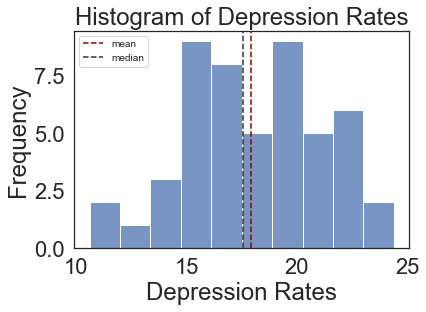

In [9]:
mean = df['Data_Value_Percents'].mean()
median = df['Data_Value_Percents'].median()
print('median: ', median)
print('mean: ', mean)
ax = sns.histplot(df['Data_Value_Percents'], bins=10)
ax.axvline(df['Data_Value_Percents'].mean(), color='darkred', linestyle='--', label='mean')
ax.axvline(df['Data_Value_Percents'].median(), color='#2e2e2e', linestyle='--', label='median')
plt.title("Histogram of Depression Rates")
plt.xlabel("Depression Rates")
plt.ylabel("Frequency")
ax.legend(loc = 2, prop={'size': 10});

Since the mean is greater than the median, then our data is slightly skewed to the right. We see that our x-axis is the percent of people that responded yes to the survey of whether they’ve been told that they had a form of depression, which we will call the depression rate. On the y-axis, there is the frequency representing the number of states that fall within the bins of the Data_Value_Percents, with the total frequency adding up to 50 states.

Our histogram is bimodal, with the highest number of states peaking at the depression rate of 15 percent and at 20 percent, each with 8 states. Since we have a bimodal distribution, this tells us that our data has about two groups, one for higher depression rates and one for lower depression rates.



4. We then find the different values that are used to understand the size and how spread out our data is, such as the minimum value, maximum value, range, 25th percentile, 75th percentile, interquartile range, variance, standard deviation, and we display a boxplot of the values of the 'Data_Value_Percents' column.

min_val:  10.6
max_val:  24.4
range:  13.799999999999999
25th percentile : 15.825000000000001
75th percentile : 20.325
IQR:  4.499999999999998
variance:  10.377044897959184
standard deviation:  3.2213420957667913


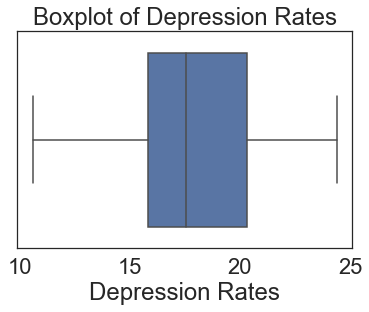

In [42]:
min_val = df['Data_Value_Percents'].min()
max_val = df['Data_Value_Percents'].max()
range_vals =  max_val - min_val
print("min_val: ", min_val)
print("max_val: ", max_val)
print("range: ", range_vals)
lower, upper = np.percentile(df['Data_Value_Percents'], [25, 75])
print("25th percentile :", lower)
print("75th percentile :", upper)
iqr = upper - lower
print("IQR: ", iqr)
sns.boxplot(x='Data_Value_Percents', data=df);
plt.xlabel("Depression Rates")
plt.title("Boxplot of Depression Rates")

var = df['Data_Value_Percents'].var()
print("variance: ", var)
sd = df['Data_Value_Percents'].std()
print("standard deviation: " , sd)

The minimum value of 10.6 represents the lowest depression rate of all the states, which is that 10.6 percent of the respondents within the state replied 'yes' to the survey that asked if they’ve ever been told that they had a form of depression. The maximum value of 24.4 represents the highest depression rate of all the states, which is that 24.4 percent of the respondents within the state replied 'yes' to the survey that asked if they’ve ever been told that they had a form of depression. The range is the difference between the lowest depression rate within a state and the highest depression rate within a state, at the value of 13.8. The 25th percentile represents the depression rate that 25% of the states are less than, at 15.825. The 75th percentile represents the depression rate that 75% of the states are less than, at 20.325. The boxplot tells us that our data is skewed because the median does not divide the box evenly; because the longer part of the box is to the right of the median, we know our data is skewed to the right. This means that the depression rates are more concentrated closer to 15-20% versus the depression rates that are greater than that.

5. We then run some more commands to learn more about our data, such as the number of unique percentages we had, the number of outliers we had, and some descriptive statics that summarize the central tendency, dispersion and shape of distribution of the 'Data_Value_Percents' column.

In [43]:
percent_unique = len(df['Data_Value_Percents'].unique())
print("number of unique percentages: ", percent_unique)
lowest_value = lower - (1.5 * iqr)
highest_value = upper + (1.5 * iqr)
num_outliers = len(df[(df['Data_Value_Percents'] < lowest_value) | (df['Data_Value_Percents'] > highest_value)])
print("There are {} outliers".format(num_outliers))
df.describe()

number of unique percentages:  44
There are 0 outliers


,Data_Value_Percents,Sample_Size
count,50.000000,50.000000
mean,17.936000,1782.280000
std,3.221342,816.333091
min,10.600000,608.000000
25%,15.825000,1174.750000
50%,17.550000,1622.000000
75%,20.325000,2232.500000
max,24.400000,4327.000000


We see that there are 44 different percentages across the states that we have, so generally most of the depression rates across each state are different. In addition, we calculated that there were no outliers, so this means that there were no states where the depression rate was drastically different from the other ones. We see that 95% of depression rates in the United States lie within 11.5% and 24.4% (2 standard deviations). We also see that 95% of the sample size for the different states lie within 149 and 3414 people (2 standard deviations).

6. We then create a map that displays a certain color for a state depending on the value of the corresponding depression rate.


In [39]:
fig1 = px.choropleth(
    df['LocationAbbr'],
    locations=df['LocationAbbr'],
    locationmode="USA-states",
    color=df['Data_Value_Percents'],
    color_continuous_scale='pubu',
    scope='usa',
    labels={'color': 'Percents'},
    title='Map of Depression Rates in the United States',
    range_color=(10, 25)
)
fig1.show()

This map helps us visualize exactly how the depression rates are distributed across the United States; the different colors for the state depending on the value of the depression rates helps us spot differences more easily. In addition, creating this map gives us a sense of whether or not location is a confounding variable for the depression rate of a state. Based on this map, it seems as though there is not really a pattern that would allow us to estimate what the depression rate in a state may be. For example, a state like New Mexico gets a lot of sunshine each year, but based on our data, its depression rate is above 20%. A possible cause for this is the confounding variable of the number of respondents in the survey of whether they've ever been told they had depression or not; some states may have a higher proportion of people who answered the survey than other states.

1. We find the shape of dataset that we cleaned from 'sunshine.csv' to understand what information we have, find out if it was being read into Python correctly, and determine what analyses are appropriate. We find out that we have information about 163 cities across 4 variables.

In [13]:
#determine rows and columns in df2
df2.shape

(163, 4)

2. We then check to see if we have any data that is missing.

In [14]:
# True if row contains at least one null value
# axis argument: 0 for reducing by 'index', 1 for reducing by 'columns'
null_rows = df2.isnull().any(axis=1)
df2[null_rows].shape

(0, 4)

In [15]:
# columns with missing values
df2.columns[df2.isnull().any(axis=0)]

Index([], dtype='object')

In [16]:
# number of missing values by column
df2.isnull().sum()

CITY                              0
STATE                             0
ANNUAL % AVG POSSIBLE SUNSHINE    0
NO. OF YEARS OF DATA              0
dtype: int64

We see that we do not have any missing values in our data.

3. We then find the mean and median for the 'ANNUAL % AVG POSSIBLE SUNSHINE' column, and we plot a histogram of the values in the 'ANNUAL % AVG POSSIBLE SUNSHINE' column in order to observe the distribution of our data.

median:  60.0
mean:  60.263803680981596


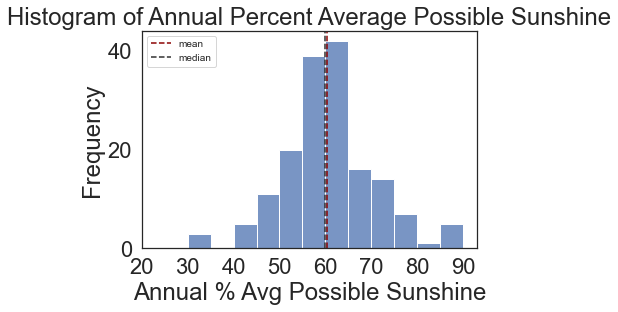

In [29]:
mean = df2['ANNUAL % AVG POSSIBLE SUNSHINE'].mean()
median = df2['ANNUAL % AVG POSSIBLE SUNSHINE'].median()
print('median: ', median)
print('mean: ', mean)
ax = sns.histplot(df2['ANNUAL % AVG POSSIBLE SUNSHINE'], bins=10, binwidth = 5)
ax.axvline(df2['ANNUAL % AVG POSSIBLE SUNSHINE'].mean(), color='darkred', linestyle='--', label='mean')
ax.axvline(df2['ANNUAL % AVG POSSIBLE SUNSHINE'].median(), color='#2e2e2e', linestyle='--', label='median')
plt.xlabel("Annual % Avg Possible Sunshine")
plt.ylabel("Frequency")
plt.title("Histogram of Annual Percent Average Possible Sunshine")
ax.legend(loc = 2, prop={'size': 10})
plt.xticks(np.arange(20, 100, 10));

Our histogram closely resembles a normal distribution, which means that the data near the mean are more frequent in occurrence than the data farther from the mean. Specifically for our data, this means that more of the values of the 'ANNUAL % AVG POSSIBLE SUNSHINE' column fall between 55% and 65%. Because we have a normal distribution, we also know that the mean and median are extremely close, if not equal; this tells us that there were little to no outliers in our data. We see that our x-axis is the annual percent average of possible sunshine in a city. On the y-axis, there is the frequency representing the number of cities that fall within the bins of the Data_Value_Percents, with the total count adding up to 163 cities.

4. We then find the different values that are used to understand the size and how spread out our data is, such as the minimum value, maximum value, range, 25th percentile, 75th percentile, interquartile range, variance, standard deviation, and we display a boxplot of the values of the 'NO. OF YEARS OF DATA' column.

min_val:  5
max_val:  112
range:  107
25th percentile : 36.5
75th percentile : 56.0
IQR:  19.5
variance:  308.00265091267147
standard deviation:  17.550004299505783


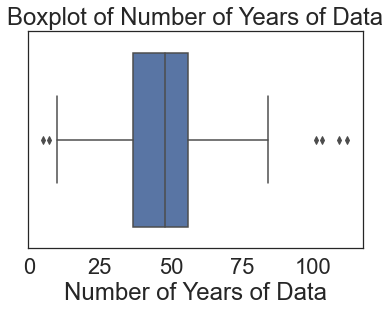

In [30]:
min_val = df2['NO. OF YEARS OF DATA'].min()
max_val = df2['NO. OF YEARS OF DATA'].max()
range_vals =  max_val - min_val
print("min_val: ", min_val)
print("max_val: ", max_val)
print("range: ", range_vals)
lower, upper = np.percentile(df2['NO. OF YEARS OF DATA'], [25, 75])
print("25th percentile :", lower)
print("75th percentile :", upper)
iqr = upper - lower
print("IQR: ", iqr)
sns.boxplot(x='NO. OF YEARS OF DATA', data=df2);
plt.xlabel("Number of Years of Data")
plt.title("Boxplot of Number of Years of Data")

var = df2['NO. OF YEARS OF DATA'].var()
print("variance: ", var)
sd = df2['NO. OF YEARS OF DATA'].std()
print("standard deviation: " , sd)

The minimum value of 5 represents the lowest number of years of data that we have for a city, which means there is a city where the data relating to annual average percent possible sunshine has been recorded for 5 years. The maximum value of 112 represents the highest number of years of data that we have for a city, which means there is a city where the data relating to annual average percent possible sunshine has been recorded for 112 years. The range is the difference between the lowest number of years of data that we have for a city and the highest number of years of data that we have for a city, at the value of 107. The 25th percentile represents the number of years of data that 25% of the cities have less than, at 36.5. The 75th percentile represents the number of years of data that 75% of the cities have less than, at 56.0. We see that there are 6 outliers because there are 6 points that are outside of the whiskers in our boxplot. This tells us that there were some cities where the number of years of data that were collected were either extremely large or extremely small compared to the other values in our dataset. Because the median does not divide the box evenly, this tells us that our data is skewed; since the left side of the box is longer than the right side, we know our data is left-skewed. This tells us that there are more values concentrated around 30-50 years of data.

5. We then run some more commands to learn more about our data, such as the number of unique percentages we had, the number of outliers we had, and some descriptive statics that summarize the central tendency, dispersion and shape of distribution of the 'NO. OF YEARS OF DATA' column.

In [19]:
percent_unique = len(df2['NO. OF YEARS OF DATA'].unique())
print("number of unique years: ", percent_unique)
lowest_value = lower - (1.5 * iqr)
highest_value = upper + (1.5 * iqr)
num_outliers = len(df2[(df2['NO. OF YEARS OF DATA'] < lowest_value) | (df2['NO. OF YEARS OF DATA'] > highest_value)])
print("There are {} outliers".format(num_outliers))
df2.describe()

number of unique years:  60
There are 6 outliers


,ANNUAL % AVG POSSIBLE SUNSHINE,NO. OF YEARS OF DATA
count,163.000000,163.000000
mean,60.263804,46.098160
std,10.114669,17.550004
min,30.000000,5.000000
25%,55.000000,36.500000
50%,60.000000,48.000000
75%,65.500000,56.000000
max,90.000000,112.000000


We see that there are 60 different periods of years of data for a city, so less than half of the periods of years of data for each city are different. In addition, we calculated that there were 6 outliers, so this means that there were some periods of years of data for a city that were drastically different from the other ones. We see that 95% of annual percent average possible sunshine lie within 40.04% and 80.48% (2 standard deviations). We also see that 95% of the number of years of data for the different states lie within 11 and 81.2 years of data (2 standard deviations).

6. We then create a histogram to see how the values of the 'NO. OF YEARS OF DATA' column are distributed.


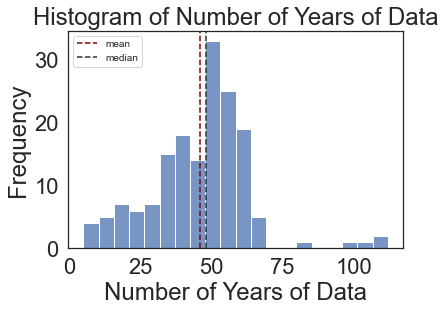

In [46]:
ax = sns.histplot(df2['NO. OF YEARS OF DATA'], bins=20)
ax.axvline(df2['NO. OF YEARS OF DATA'].mean(), color='darkred', linestyle='--', label='mean')
ax.axvline(df2['NO. OF YEARS OF DATA'].median(), color='#2e2e2e', linestyle='--', label='median')
plt.xlabel("Number of Years of Data")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Years of Data")
ax.legend(loc = 2, prop={'size': 10})
f4 = plt.gcf()

We see that there is a left-skewed distribution in this histogram because there is a long left tail; this means that the median is greater than the mean. In addition, this means that there are more values concentrated around 0-60 years versus later years. Our histogram is unimodal, with the peak happening around 50 years of data. 

7. Because the data of the Depression Rates was gathered by states, we then group the cities of the Annual % Avg Possible Sunshine and find the average across these groups in order to use this later to compare both of the datasets. 

In [21]:
sum_of_sunshine = df2.groupby("STATE").sum()['ANNUAL % AVG POSSIBLE SUNSHINE']
num_count = df2.groupby("STATE").count()["CITY"]
state_avg_sunshine = round(sum_of_sunshine / num_count, 2)
state = np.array(state_avg_sunshine.index)
data = np.array(state_avg_sunshine)
d = {'STATE': state, "STATE AVG % SUNSHINE": data}
df_state = pd.DataFrame(data=d)
df_state.set_index("STATE")

,STATE AVG % SUNSHINE
STATE,
AK,37.67
AL,57.67
AR,65.00
AZ,84.50
CA,71.86
CO,72.00
CT,56.00
FL,66.83
GA,62.67


8. We then create a map that displays a certain color for a state depending on the value of the corresponding annual percentages of average possible sunshine.

In [38]:
fig2 = px.choropleth(
    df_state['STATE'],
    locations=df_state['STATE'],
    locationmode="USA-states",
    color=df_state['STATE AVG % SUNSHINE'],
    color_continuous_scale='reds',
    scope='usa',
    labels={'color': 'Percents'},
    title='Map of Annual Percent Average Possible Sunshine in the United States',
    
)
fig2.show()

This map helps us visualize exactly how the annual percentages of average possible sunshine are distributed across the United States; the different colors for the state depending on the value of the possible sunshine percentages helps us spot differences more easily. In addition, creating this map gives us a sense of whether or not location is a confounding variable for the possible sunshine percentage of a state. Based on this map, it seems as though there is a pattern that states that are closer to the southern part of the United States have a higher annual percentage of average possible sunshine than states that are closer to the northern part of the United States (with the exception of Alaska because that is not its actual location in the real world). 

10. We then find the different values that are used to understand the size and how spread out our data is, such as the minimum value, maximum value, range, 25th percentile, 75th percentile, interquartile range, variance, standard deviation, and we display a boxplot of the values of the 'STATE AVG % SUNSHINE' column.

min_val:  37.67
max_val:  84.5
range:  46.83
25th percentile : 55.0
75th percentile : 64.33
IQR:  9.329999999999998
variance:  80.75999931972788
standard deviation:  8.986656737615379


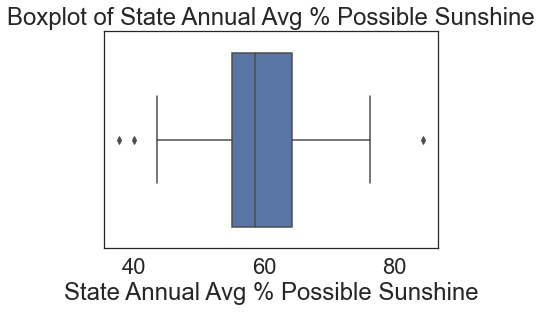

In [40]:
min_val = df_state['STATE AVG % SUNSHINE'].min()
max_val = df_state['STATE AVG % SUNSHINE'].max()
range_vals =  max_val - min_val
print("min_val: ", min_val)
print("max_val: ", max_val)
print("range: ", range_vals)
lower, upper = np.percentile(df_state['STATE AVG % SUNSHINE'], [25, 75])
print("25th percentile :", lower)
print("75th percentile :", upper)
iqr = upper - lower
print("IQR: ", iqr)
sns.boxplot(x='STATE AVG % SUNSHINE', data=df_state);
plt.xlabel("State Annual Avg % Possible Sunshine")
plt.title("Boxplot of State Annual Avg % Possible Sunshine")

var = df_state['STATE AVG % SUNSHINE'].var()
print("variance: ", var)
sd = df_state['STATE AVG % SUNSHINE'].std()
print("standard deviation: " , sd)

The minimum value of 37.67 represents the lowest annual average percentage of possible sunshine that we have for a state, which means there is a state where the annual average percentage of possible sunshine is 37.67%. The maximum value of 84.5 represents the highest annual average percentage of possible sunshine that we have for a state, which means there is a state where the annual average percentage of possible sunshine is 84.5%. The range is the difference between the lowest annual average percentage of possible sunshine that we have for a state and the highest annual average percentage of possible sunshine that we have for a state, at the value of 46.83. The 25th percentile represents the annual average percentage of possible sunshine that 25% of the states have less than, at 55.0. The 75th percentile represents the annual average percentage of possible sunshine that 75% of the states have less than, at 64.33. Because the median does not divide the box evenly, we know that our data is skewed. Since the right side of the box is longer than the left side, we know that our data is right-skewed. This means that there are more percentages concentrated above 60%.

11. We then run some more commands to learn more about our data, such as the number of unique percentages we had, the number of outliers we had, and some descriptive statics that summarize the central tendency, dispersion and shape of distribution of the 'STATE AVG % SUNSHINE' column.

In [24]:
percent_unique = len(df_state['STATE AVG % SUNSHINE'].unique())
print("number of unique years: ", percent_unique)
lowest_value = lower - (1.5 * iqr)
highest_value = upper + (1.5 * iqr)
num_outliers = len(df_state[(df_state['STATE AVG % SUNSHINE'] < lowest_value) | (df_state['STATE AVG % SUNSHINE'] > highest_value)])
print("There are {} outliers".format(num_outliers))
print("mean: ", df_state['STATE AVG % SUNSHINE'].mean())
print("median: ", df_state['STATE AVG % SUNSHINE'].median())
df_state.describe()

number of unique years:  43
There are 3 outliers
mean:  59.160816326530615
median:  58.67


,STATE AVG % SUNSHINE
count,49.000000
mean,59.160816
std,8.986657
min,37.670000
25%,55.000000
50%,58.670000
75%,64.330000
max,84.500000


We see that there are 43 different annual average percentages of possible sunshine across the states, so generally most of the annual average percentages of possible sunshine across each state are different. In addition, we calculated that there were 3 outliers, so this means that there were some annual average percentages of possible sunshine across the states that were drastically different from the other ones. We see that 95% of annual average percentages of possible sunshine across the states lie within 41.18% and 77.14% (2 standard deviations). We also see that our mean and median are close to each other, which means that our data is not skewed that much.

12. We then created a new data frame that allows us to put the 'STATE AVG % SUNSHINE' column with the 'DEPRESSION_RATES' column.

In [25]:
df_without_DE = df[df["LocationAbbr"] != "DE"]
df_without_DE = df_without_DE.sort_values("LocationAbbr")
df_without_DE = df_without_DE.rename(columns = {"LocationAbbr":"STATE"})
df_state = df_state.sort_values("STATE")
new_table = pd.merge(df_state, df_without_DE, on='STATE')
new_table = new_table.drop(columns = ["ID", "Sample_Size"])
new_table = new_table.set_index("STATE")
new_table = new_table.rename(columns = {"Data_Value_Percents": "DEPRESSION_RATES"})
new_table = new_table.rename(columns = {"STATE AVG % SUNSHINE": "STATE_AVG_SUNSHINE",  "DEPRESSION_RATES": "DEPRESSION_RATES"})
new_table

,STATE_AVG_SUNSHINE,DEPRESSION_RATES
STATE,,
AK,37.67,16.5
AL,57.67,21.2
AR,65.00,22.8
AZ,84.50,17.5
CA,71.86,12.3
CO,72.00,17.6
CT,56.00,15.4
FL,66.83,16.5
GA,62.67,14.9


We use a scatter plot to see how the values in the 'STATE AVG % SUNSHINE' column correspond to the values in the 'DEPRESSION_RATES' column depending on the state.

                            OLS Regression Results                            
Dep. Variable:       DEPRESSION_RATES   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.514
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.225
Time:                        14:34:27   Log-Likelihood:                -125.38
No. Observations:                  49   AIC:                             254.8
Df Residuals:                      47   BIC:                             258.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             21.7442      3

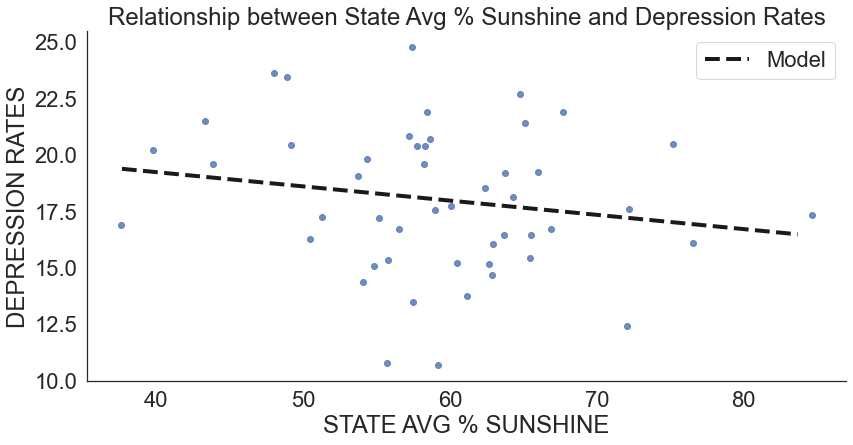

In [41]:
sns.lmplot(x='STATE_AVG_SUNSHINE', y='DEPRESSION_RATES', 
           data=new_table, fit_reg=False, 
           height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);

outcome, predictors = patsy.dmatrices('DEPRESSION_RATES ~ STATE_AVG_SUNSHINE', new_table)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

xs = np.arange(new_table['STATE_AVG_SUNSHINE'].min(), new_table['STATE_AVG_SUNSHINE'].max())
ys = -0.0631 * xs + 21.7442
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('STATE AVG % SUNSHINE')
plt.ylabel('DEPRESSION RATES')
plt.title('Relationship between State Avg % Sunshine and Depression Rates')
plt.legend();

From this scatterplot, we see that there is a slightly downhill pattern of the dots as we move from left to right. As the state annual average percentage of possible sunshine increases, the depression rates slightly decrease. This means there may be a small relationship between state annual average percentages of possible sunshine and depression rates.

We took a linear regression approach, or regression analysis because we found it most appropriate to represent our data, which was to show or predict the relationship between our variables, sunshine and depression rates, or more specifically whether the amount of sun people were exposed to could affect whether they were depressed. We created a scatterplot that had the state’s average sunshine on the x-axis and the depression rates on the y-axis. We added a linear regression line to our scatterplot and found our r value to be -0.176. Thus, our r value tells us we have a slight negative correlation between sunshine and depression rate, meaning it isn’t a strong correlation between the two. However, our regression line shows a negative slope, which means that when a state’s sunshine increases, then the depression rate at that state has a slight decrease. Thus, we have supported our hypothesis that the average sunshine within a state and the depression rate within that state has a negative correlation.



We used descriptive analysis to get a better sense of how our data was distributed, any potential associations between variables, and find any outliers in our data. Specifically, we did this by creating histograms for the depression rates, the annual percent averages of possible sunshine, and the number of years of data; we also created boxplots for the depression rates, the number of years of data, and the state annual percent averages of possible sunshine. Also, we calculated, the mean, median, standard deviation, minimum values, maximum values, and range for the quantitative variables. 

# Ethics & Privacy

Since many people may not want others to know that they have a mental illness, we will only be working with ID’s of those whose results were used to calculate the depression rates of each state. This is to respect their privacy and consent to the survey and will make sure that we do not accidentally affect the person in any way. In addition, the dataset from the Behavioral Risk Factor Surveillance System (BRFSS) already anonymized the names of the respondents by using ID's instead of names for each response to the survey.

There may be collection bias since not everyone has access to healthcare, and there are differing size samples for each survey. We must take this into account when wrangling the data into tidy data. We want to make sure that each size sample is representative of the location and population. To make sure we are working with consistent data, we will work with the same data set throughout the analysis. Since we are working with self-answered responses, not the actual depression-diagnosed rates, the data we will be working with will include a range because we are working with different levels of confidence. We will be careful of overlap and consider the possibility that the real percentage could be anywhere in that range when analyzing the data.

Some issues that may appear when working with the data set is that not everyone may have been comfortable answering “yes” to the question “Ever told you that you have a form of depression?“. Due to that fact, we will be careful when making a conclusion because there may be some error in the dataset.

Because we had a DataFrame with only the depression rates and the state annual average percent sunshine, we did not use the column of ID's in our analysis. 


# Conclusion & Discussion

For this project, we tried to find out if there was a relationship between the amount of sunshine exposure that a state in the United States receives and whether or not an adult responded yes to if they've ever been told they had a form of depression. We narrowed down the data we were going to use to two different datasets. One was from the Behavioral Risk Factor Surveillance System (BRFSS) and it contained data regarding survey results of asking adults in the United States if they've ever been told they had a form of depression. The other one was from the National Oceanic and Atmospheric Administration and it contained data collected over various years regarding the percent annual possible sunshine in different cities. This data was not presented in a format that would allow us to use it immediately, so we had to do some data cleaning on the sets; this consisted of dropping unnecessary rows and columns, dropping rows and columns that contained null values, and renaming columns.

For our analysis, we first did exploratory data analysis on both of the datasets to learn about the shape of our data and double-check that there weren't any missing/null values after we cleaned the datasets. Then, we did descriptive analysis on the different variables in our datasets to get a better sense of how the data was distributed, any potential associations between variables, and find any outliers in our data; specifically, we did this by creating histograms, boxplots, and chloropleths. Finally, we did a regression analysis between the sunshine and depression rates to see if there was a possible relationship between the two variables. We found that the regression line showed a negative slope, which means that as the amount of sunshine exposure increased, the depression rate decreased. Even though we do have a negative slope, it is not very strong; this may be the result of other confounding variables in our analysis. Thus, we we were able to support our hypothesis that the average sunshine within a state and the depression rate within that state has a negative correlation. Since some states receive more sunlight than others, it seems as though depression rates would be lower in places where there is more sunlight on average because sunlight is necessary to regulate serotonin and melatonin levels.

One limitation of our project is that the data on the annual sunshine percentages did not contain any cities in Delaware; thus, we were only able to gather data from 49 states for the annual sunshine percentages. Another limitation of our project was that the data was not from recent years; specifically, the dataset for the depression rates was from 2011, and the number of years of data that were collected for each city in the annual sunshine percentages varied greatly. In addition, a limitation of our project was that the proportion of people that responded to the survey of whether they've been told they had a form of depression before varied across each state; furthermore, some of the respondents may have answered the survey untruthfully or may have been hesitant to admit that they have depression. The impact that this project has on society is that it raises awareness about the positive effects that sunshine may have on preventing or treating depression.

# Team Contributions

- Justin: Overview, Research Question, Background & Prior Work, Dataset(s), Data Analysis & Results, Conclusion & Discussion, Presentation slides
- Jonathan: Data Cleaning, Data Visualizations, Background & Prior Work, Ethics & Privacy, Data Analysis & Results, Presentation slides
- Simon: Research Question, Background and Prior Work, Hypothesis, Data Analysis and Results, Presentation slides and video
- Sabrina: Research Question, Background & Prior Work, Hypothesis, Datasets, Presentations slides and video